Dans ce notebook, nous voulons flouter une image.

On note $*$ le produit de convolution, appliquer un filtre flou revient a faire une convolution entre l'image et le filtre. Ainsi grace à la relation $\mathcal{F}(u*v) = \mathcal{F}(u)\mathcal{F}(v)$ on peut appliquer la convolution beaucoup plus rapidement $u*v = \mathcal{F}^{-1}(\mathcal{F}(u)\mathcal{F}(v))$ c'est ce qu'on va faire ici.

Le filtre est un filtre gaussien, cad qu'il est défini à partir de la fonction:
$$ g(x,y) = \frac{1}{2\pi \sigma^{2}}\exp(-\frac{x^2 + y^2}{2*\sigma^2}) $$ où $\sigma$ est un réel généralement entre 0.1 et 2 qui caractérise l'intensité du flou.

In [303]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from math import exp, pi

In [304]:
img = Image.open("tournesol.png")

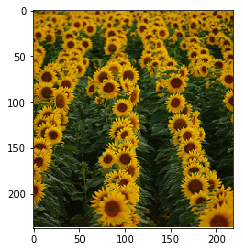

In [305]:
plt.imshow(img)
plt.show()

In [314]:
def grey(arr):
    (X,Y) = arr.shape[:2]
    arr = arr.astype(complex)
    a = np.zeros((X,Y), dtype=complex)
    for x in range(X):
        for y in range(Y):
            a[x][y] = (arr[x][y][0] + arr[x][y][1] + arr[x][y][2])/3
    return a

In [315]:
u = np.asarray(img)
u = grey(u)

In [316]:
c = np.zeros(u.shape)

In [325]:
(X,Y) = c.shape
o = 1.5
for x in range(-X//2, X//2):
    for y in range(-Y//2, Y//2):
        c[x][y] = exp(-((x**2 + y**2)/(2*(o**2))))/(2*pi*(o**2))

In [326]:
t = abs(np.fft.ifft2(np.fft.fft2(u)*np.fft.fft2(c)))

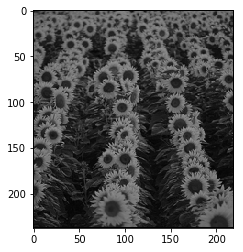

In [328]:
u_out = Image.fromarray(abs(u).astype(np.uint8))
plt.imshow(u_out)
plt.show()

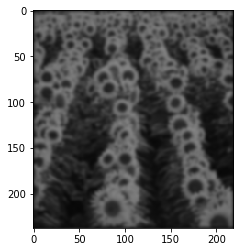

In [329]:
t_out = Image.fromarray(t.astype(np.uint8))
plt.imshow(t_out)
plt.show()